# Algorithm Performance Assessment

Self standing Python code and results within Jupyter Book

## L1 E2ES Demonstration Reference Scenario (Picasso) scene definition

```{figure} ./figures/picasso-scene.png
--- 
name: picasso-scene
width: 500px
---
Demonstration Reference Scenario (Picasso) including a radiometric scene (left) representing 8 different surface types (2x sea ice, 2x land, 4x ocean) adjacent to each other and sea ice concentration sub-resolution gradients, and a geometric scene (right) with a high-contrast brightness temperature pattern.
```

## Algorithm Performance Metrics (MPEF)

The performance of the TSA algorithm is evaluated by means of classification accuracy.
For this, TSA estimates are divided into true positive (TP), false positive (FP), true negative (TN) and false negative (FN) observations.
Those observation classes for a single day are used to calculate the daily classification accuracy:

```{math}
:label: accuracy
\text{accuracy} = \frac{\text{TP}+\text{TN}}{\text{TP}+\text{FP}+\text{TN}+\text{FN}},
```

which is obtained for all days and subsequently used to derive monthly and total mean accuracy values.
In addition, observation classes are binned with respect to corresponding in situ SD which clarifies the ability of the TSA algorithm to detect dry snow for varying snow depth.

## Algorithm Calibration Data Set (ACDAT)



## Algorithm Validation Data Set (AVDAT)



## Test Results using Demonstration Reference Scenario



In [1]:
import os 
import sys
import numpy as np
import xarray as xr
import pyresample as pr
import importlib
from matplotlib import pyplot as plt
from matplotlib import colors
from cartopy import crs as ccrs

# local imports
if '/algorithm/' not in sys.path:
    sys.path.insert(0, os.path.abspath('../.../') + 'algorithm/')
if '/tools/' not in sys.path:
    sys.path.insert(0, os.path.abspath('../.../') + 'algorithm/tools/')
import l2_format as l2
import TSA_algorithm as algorithm
import l2_tools as tools

In [2]:
# reload local imports
importlib.reload(l2)
importlib.reload(algorithm)
importlib.reload(tools)

<module 'l2_tools' from 'C:\\Users\\zschende\\OneDrive - Ilmatieteen laitos\\Files\\Projects\\CIMR Devalgo\\ATBD\\TerrestrialSnowArea_ATBD_v2\\algorithm/tools\\l2_tools.py'>

Reprojection for algorithm performance assessment: EASE2 1km (test card ground truth)

In [3]:
l2_grid = 'testcard_ease2_1km'
area_def = pr.load_area('../algorithm/testcard_adef.yaml',l2_grid)

cart_crs = area_def.to_cartopy_crs()
# extent = cart_crs.bounds
trg_lon, trg_lat = area_def.get_lonlats()

### Radiometric Demonstration Reference Scenario

In [4]:
# load ground truth of test card
test_card_name = 'devalgo_radiometric'

dem_ref_scene = 'C:/Users/zschende/OneDrive - Ilmatieteen laitos/Files/Projects/CIMR Devalgo/Data/Test_scenes_downscaled_projected/test_scene_1_compressed_lowres.nc'
data_rad = xr.open_dataset(dem_ref_scene)
# mirror ground truth on x-axis
landmask_rad = np.flip(data_rad['landflag'].values,0)
surfaces_rad = np.flip(data_rad['surfaces'].values,0)
lon_rad = np.flip(data_rad['Longitude'].values,0)
lat_rad = np.flip(data_rad['Latitude'].values,0)

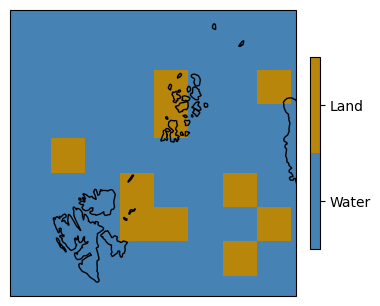

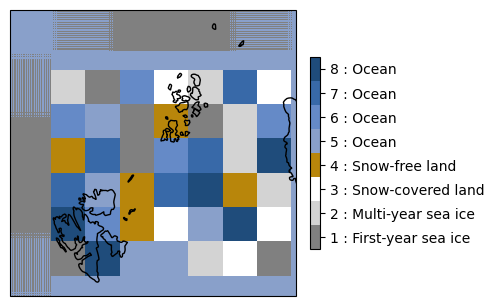

In [5]:
cmap = colors.ListedColormap(['steelblue', 'darkgoldenrod'])
vrange=[-0.5,0.5,1.5]
norm = colors.BoundaryNorm(vrange, cmap.N)

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=+90.0))
img = ax.pcolormesh(lon_rad, lat_rad, landmask_rad, transform=ccrs.PlateCarree(), cmap=cmap)
cbar = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=vrange, ticks=[0,1], fraction=0.031, pad=0.046)
cbar.ax.set_yticklabels(['Water', 'Land'])
ax.coastlines()
# ax.set_extent([-110, 110, 60, 90], crs=ccrs.PlateCarree())
plt.gcf().set_size_inches((4,4))
plt.show()

cmap = colors.ListedColormap(['grey', 'lightgrey', 'white', 'darkgoldenrod', '#89A0CA', '#658AC7', '#3869A8', '#1F4C7B'])
vrange=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
norm = colors.BoundaryNorm(vrange, cmap.N)

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=+90.0))
img = ax.pcolormesh(lon_rad, lat_rad, surfaces_rad, transform=ccrs.PlateCarree(), cmap=cmap)
# ax.set_title('Test Card Surfaces')
cbar = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=vrange, ticks=[1,2,3,4,5,6,7,8], fraction=0.031, pad=0.046)
cbar.ax.set_yticklabels(['1 : First-year sea ice', '2 : Multi-year sea ice', '3 : Snow-covered land', '4 : Snow-free land', '5 : Ocean', '6 : Ocean', '7 : Ocean', '8 : Ocean'])
ax.coastlines()
# ax.set_extent([-10, 90, 75, 90,], crs=ccrs.PlateCarree())
plt.gcf().set_size_inches((4,4))
plt.show()

Testing:

In [6]:
if test_card_name == 'devalgo_radiometric':
    l1x = 'C:/Users/zschende/OneDrive - Ilmatieteen laitos/Files/Projects/CIMR Devalgo/Data/L1C Files/Radiometric/W_PT-DME-Lisbon-SAT-CIMR-1X@KA_C_DME_20230420T103323_LD_20280110T114800_20280110T115700_TN.nc'
elif test_card_name == 'devalgo_geometric':
    l1x = 'C:/Users/zschende/OneDrive - Ilmatieteen laitos/Files/Projects/CIMR Devalgo/Data/L1C Files/Geometric/W_PT-DME-Lisbon-SAT-CIMR-1X@KA_C_DME_20230420T103323_LD_20280110T114800_20280110T115700_TN.nc'

data_fwd,geoloc_fwd,data_bck,geoloc_bck = tools.read_l1x(l1x)

In [7]:
# TSA algorithm
algo = 'Pulliainen2010'

TSA_fwd = algorithm.dry_snow_detection(data_fwd,tsa_algorithm=algo)
TSA_bck = algorithm.dry_snow_detection(data_bck,tsa_algorithm=algo)

TSA_fwd_proj = tools.reproject_to_grid(TSA_fwd,geoloc_fwd,area_def=area_def,radius_of_influence=5000)
TSA_bck_proj = tools.reproject_to_grid(TSA_bck,geoloc_bck,area_def=area_def,radius_of_influence=5000)

TSA_rad, TSA_uncert_rad = tools.combine_proj(TSA_fwd_proj,TSA_bck_proj)

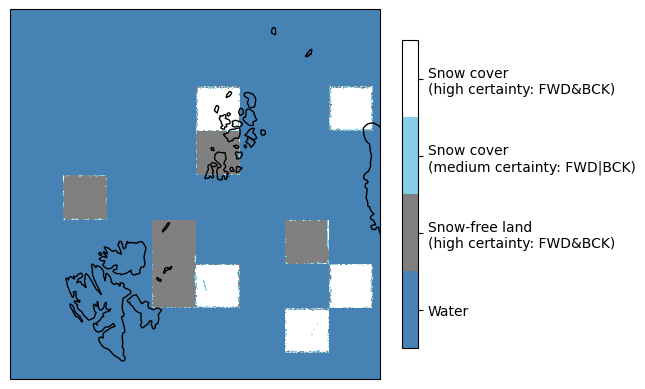

In [8]:
TSA_plot_rad = TSA_uncert_rad + 1
TSA_plot_rad[landmask_rad == 0] = 0                              # water
TSA_plot_rad[TSA_plot_rad == 2] = 3 
TSA_plot_rad[TSA_plot_rad == 1.5] = 2

cmap = colors.ListedColormap(['steelblue', 'grey', 'skyblue', 'white'])
vrange=[-0.5,0.5,1.5,2.5,3.5]
norm = colors.BoundaryNorm(vrange, cmap.N)

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=+90.0))
img = ax.pcolormesh(trg_lon, trg_lat, TSA_plot_rad, transform=ccrs.PlateCarree(), cmap=cmap)
# ax.set_title('Radiometric Test Card Evaluation')
cbar = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=vrange, ticks=[0,1,2,3], fraction=0.031, pad=0.046)
cbar.ax.set_yticklabels(['Water', 'Snow-free land\n(high certainty: FWD&BCK)', 'Snow cover\n(medium certainty: FWD|BCK)', 'Snow cover\n(high certainty: FWD&BCK)'])
ax.coastlines()
# plt.gcf().set_size_inches((20,20))

# plt.savefig('tsa_uncert.png', format='png', dpi=1200, bbox_inches='tight')
plt.show()

### Geometric Demonstration Reference Scenario

In [9]:
# load ground truth of test card
test_card_name = 'devalgo_geometric'

dem_ref_scene = 'C:/Users/zschende/OneDrive - Ilmatieteen laitos/Files/Projects/CIMR Devalgo/Data/Test_scenes_downscaled_projected/test_scene_2_compressed_lowres.nc'
data_geo = xr.open_dataset(dem_ref_scene)
# # mirror ground truth on x-axis
# landmask_geo = np.flip(data_ref['landflag'].values,0)     # no landmask available for geometric scenario
surfaces_geo = np.flip(data_geo['surfaces'].values,0)
lon_geo = np.flip(data_geo['Longitude'].values,0)
lat_geo = np.flip(data_geo['Latitude'].values,0)

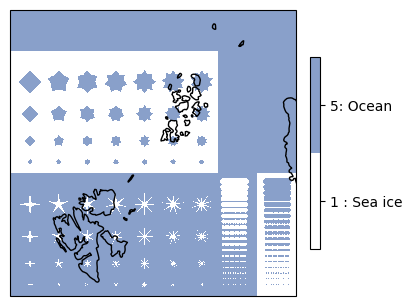

In [10]:
cmap = colors.ListedColormap(['white', '#89A0CA'])
vrange=[-0.5,0.5,5.5]
norm = colors.BoundaryNorm(vrange, cmap.N)

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=+90.0))
img = ax.pcolormesh(lon_geo, lat_geo, surfaces_geo, transform=ccrs.PlateCarree(), cmap=cmap)
cbar = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=vrange, ticks=[0,3], fraction=0.031, pad=0.046)
cbar.ax.set_yticklabels(['1 : Sea ice', '5: Ocean'])
ax.coastlines()
# ax.set_extent([-110, 110, 60, 90], crs=ccrs.PlateCarree())
plt.gcf().set_size_inches((4,4))
plt.show()

Testing:

In [11]:
if test_card_name == 'devalgo_radiometric':
    l1x = 'C:/Users/zschende/OneDrive - Ilmatieteen laitos/Files/Projects/CIMR Devalgo/Data/L1C Files/Radiometric/W_PT-DME-Lisbon-SAT-CIMR-1X@KA_C_DME_20230420T103323_LD_20280110T114800_20280110T115700_TN.nc'
elif test_card_name == 'devalgo_geometric':
    l1x = 'C:/Users/zschende/OneDrive - Ilmatieteen laitos/Files/Projects/CIMR Devalgo/Data/L1C Files/Geometric/W_PT-DME-Lisbon-SAT-CIMR-1X@KA_C_DME_20230417T105425_LD_20280110T114800_20280110T115700_TN.nc'

data_fwd,geoloc_fwd,data_bck,geoloc_bck = tools.read_l1x(l1x)

In [12]:
# TSA algorithm
algo = 'Pulliainen2010'

TSA_fwd = algorithm.dry_snow_detection(data_fwd,tsa_algorithm=algo)
TSA_bck = algorithm.dry_snow_detection(data_bck,tsa_algorithm=algo)

TSA_fwd_proj = tools.reproject_to_grid(TSA_fwd,geoloc_fwd,area_def=area_def,radius_of_influence=5000)
TSA_bck_proj = tools.reproject_to_grid(TSA_bck,geoloc_bck,area_def=area_def,radius_of_influence=5000)

TSA_geo, TSA_uncert_geo = tools.combine_proj(TSA_fwd_proj,TSA_bck_proj)

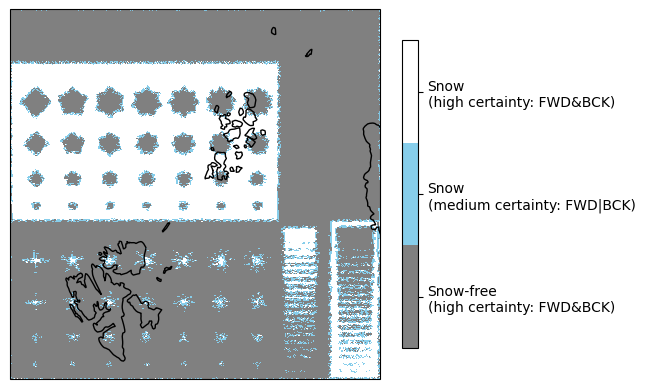

In [13]:
TSA_plot_geo = TSA_uncert_geo + 1
# TSA_plot_geo[landmask_geo == 0] = 0                              # no water mask for geo
TSA_plot_geo[TSA_plot_geo == 2] = 3 
TSA_plot_geo[TSA_plot_geo == 1.5] = 2

cmap = colors.ListedColormap(['grey', 'skyblue', 'white'])
vrange=[0.5,1.5,2.5,3.5]
norm = colors.BoundaryNorm(vrange, cmap.N)

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=+90.0))
img = ax.pcolormesh(trg_lon, trg_lat, TSA_plot_geo, transform=ccrs.PlateCarree(), cmap=cmap)
# ax.set_title('Geometric Test Card Evaluation')
cbar = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=vrange, ticks=[1,2,3], fraction=0.031, pad=0.046)
cbar.ax.set_yticklabels(['Snow-free\n(high certainty: FWD&BCK)', 'Snow\n(medium certainty: FWD|BCK)', 'Snow\n(high certainty: FWD&BCK)'])
ax.coastlines()
# plt.gcf().set_size_inches((20,20))

# plt.savefig('tsa_uncert2.png', format='png', dpi=1200, bbox_inches='tight')
plt.show()

## Algorithm Performance Assessment using Demonstration Reference Scenario

Only for radiometric test card since geometric does not have snow-free/snow-covered land.

In [14]:
TSA_rad_diff = np.zeros(TSA_rad.shape)
TSA_rad_diff[TSA_rad_diff == 0] = np.nan

TSA_rad_diff[(surfaces_rad == 3) & (TSA_rad == 0)] = -1  # FN
TSA_rad_diff[(surfaces_rad == 3) & (TSA_rad == 1)] = 0   # TP
TSA_rad_diff[(surfaces_rad == 4) & (TSA_rad == 0)] = 1   # TN
TSA_rad_diff[(surfaces_rad == 4) & (TSA_rad == 1)] = 2   # FP
TSA_rad_diff[landmask_rad == 0] = -2                               # water
TSA_rad_diff[(surfaces_rad == 1) | (surfaces_rad == 2)] = -3       # sea ice

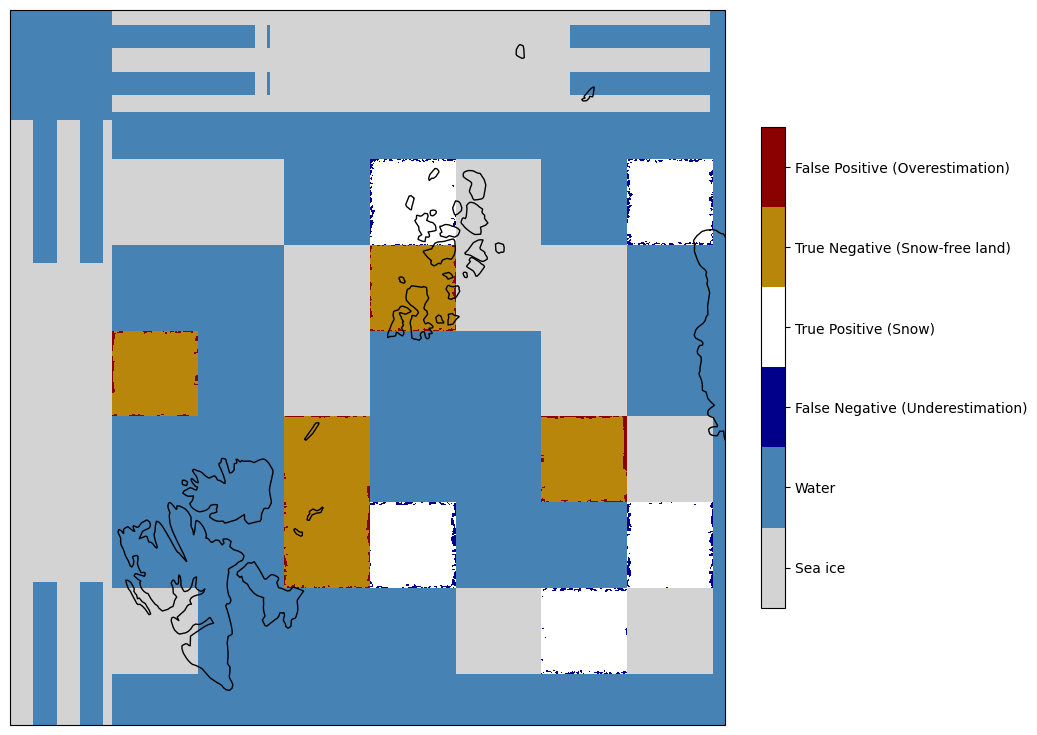

In [15]:
cmap = colors.ListedColormap(['lightgrey','steelblue','darkblue', 'white', 'darkgoldenrod', 'darkred'])
vrange=[-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5]
norm = colors.BoundaryNorm(vrange, cmap.N)

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=+90.0))
img = ax.pcolormesh(trg_lon, trg_lat, TSA_rad_diff, transform=ccrs.PlateCarree(), cmap=cmap)
# ax.set_title('Test Card Evaluation')
cbar = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=vrange, ticks=[-3, -2,-1,0,1,2], fraction=0.031, pad=0.046)
cbar.ax.set_yticklabels(['Sea ice', 'Water', 'False Negative (Underestimation)', 'True Positive (Snow)', 'True Negative (Snow-free land)', 'False Positive (Overestimation)'])
ax.coastlines()
# ax.set_extent([-110, 110, 60, 90], crs=ccrs.PlateCarree())
plt.gcf().set_size_inches((10,10))
# plt.savefig('tsa_eval.png', format='png', dpi=1200, bbox_inches='tight')

plt.show()

Statistics:

In [16]:
# count evaluated pixels
unique, counts = np.unique(TSA_rad_diff, return_counts=True)
print(dict(zip(unique,counts)))
fn = counts[2]              # -1: FN
tp = counts[3]              #  0: TP
tn = counts[4]              #  1: TN
fp = counts[5]              #  2: FP
total = np.sum(counts[2:])  # ignore water and sea ice for total count

acc = np.sum(tp+tn)/total   # (TP+FN percentage)
print('Accuracy:', acc)
tpr = tp/(np.sum(tp+fn))
print('TP rate:', tpr)
tnr = tn/(np.sum(tn+fp))
print('TN rate:', tnr)

{-3.0: 689088, -2.0: 988672, -1.0: 6223, 0.0: 134897, 1.0: 136021, 2.0: 5099}
Accuracy: 0.9598852040816327
TP rate: 0.9559027777777778
TN rate: 0.9638676303854875
